# Explore the data in a GRDC day file

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Read in station data from a folder containing the GRDC files, using the station identifier.

In [2]:
## Open the file, skip the metadata and plot the daily data

def dataframe_from_stationId(grdc_folder, station_id):
    ''' Search the grdc_folder for a file with name <station_id>.day,
    skip the header rows and return the dates and discharges in a dataframe'''
    filename = str(station_id) + ".day"
    grdc_file = os.path.join(grdc_folder, filename)

    grdc_data = pd.read_csv(grdc_file, skiprows=40, delimiter=';')
    grdc_data = grdc_data.rename(columns={'YYYY-MM-DD': 'date', ' Original': 'discharge'})
    grdc_data = grdc_data.reset_index().set_index(pd.DatetimeIndex(grdc_data['date']))
    grdc_data = grdc_data[['date', 'discharge']]
    
    return grdc_data

my_grdc_folder = "D:\sbranchett\Jerom\GRDCdat_day"
my_stations = ["mytest", 5202150, 6196700, 1445500]

grdc_dataframes = {}
for station in my_stations:
    grdc_dataframes[station] = dataframe_from_stationId(my_grdc_folder, station)
grdc_dataframes

{'mytest':                   date  discharge
 date                             
 1970-08-02  1970-08-02   -999.000
 1970-08-03  1970-08-03   -999.000
 1970-08-04  1970-08-04   -999.000
 1970-08-05  1970-08-05   -999.000
 1970-08-06  1970-08-06   -999.000
 1970-08-07  1970-08-07   -999.000
 1970-08-08  1970-08-08   -999.000
 1970-08-01  1970-08-01   -999.000
 1970-08-09  1970-08-09   -999.000
 1970-08-10  1970-08-10   -999.000
 1970-08-11  1970-08-11   -999.000
 1970-08-12  1970-08-12   -999.000
 1970-08-13  1970-08-13   -999.000
 1970-08-14  1970-08-14   -999.000
 1970-08-15  1970-08-15      0.008
 1970-08-16  1970-08-16      0.008
 1970-08-17  1970-08-17      0.008
 1970-08-18  1970-08-18      0.008
 1970-08-19  1970-08-19      0.007
 1970-08-20  1970-08-20      0.008
 1970-08-21  1970-08-21      0.008
 1970-08-22  1970-08-22      0.011
 1970-08-23  1970-08-23      0.028
 1970-08-24  1970-08-24      0.051
 1970-08-25  1970-08-25      0.050
 1970-08-26  1970-08-26      0.045
 1970-08-2

Missing data is set to -999, so these are easily visible as large negative values of discharge.

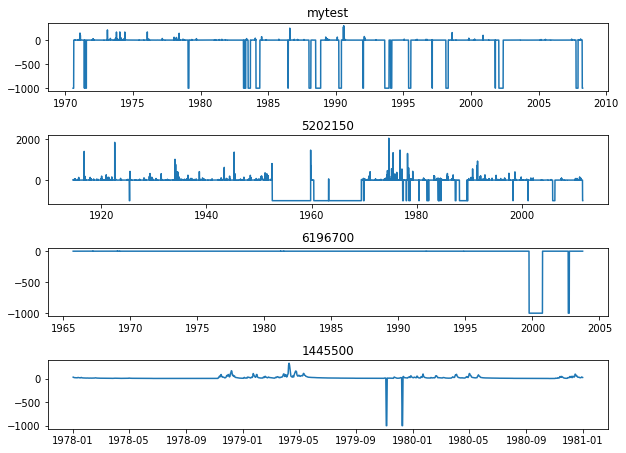

In [3]:
no_plots = len(grdc_dataframes)

fig, axs = plt.subplots(no_plots, 1, figsize=(8.8, 1.6*no_plots))

subplot_index = 0 # todo: this can probably be done better, doesn't work for one station
for idx, grdc_dataframe in grdc_dataframes.items():
    axs[subplot_index].plot(grdc_dataframe.drop(columns=['date']))
    axs[subplot_index].set_title(idx)
    subplot_index += 1

plt.tight_layout()

## Make a dataframe containing valid discharge values for all the stations of interest

In [4]:
combined = grdc_dataframes['mytest'] # todo: this could be better
for idx, grdc_dataframe in grdc_dataframes.items():
    combined = pd.merge(combined, grdc_dataframe, how='outer', on='date',
                        suffixes=('', '_'+str(idx)), sort=True)
combined = combined.replace(-999., np.nan)
combined = combined.dropna(axis=0, how='any')
try: combined = combined.drop(columns=['ordinal'])
except: pass
combined

C:\Users\sbranchett\AppData\Local\Continuum\Anaconda3\envs\ewatercycle\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,discharge,discharge_mytest,discharge_5202150,discharge_6196700,discharge_1445500
23144,1978-01-12,0.005,0.005,1.290,0.0,29.0
23145,1978-01-13,0.005,0.005,1.134,0.0,26.0
23146,1978-01-14,0.009,0.009,1.015,0.0,24.0
23147,1978-01-15,0.018,0.018,0.929,0.0,23.0
23148,1978-01-16,59.939,59.939,1.218,0.0,22.0
23149,1978-01-17,5.217,5.217,1.212,0.0,22.0
23150,1978-01-18,7.519,7.519,1.124,0.0,30.0
23151,1978-01-19,19.173,19.173,1.300,0.0,28.0
23152,1978-01-20,4.316,4.316,1.351,0.0,23.0
23153,1978-01-21,2.131,2.131,1.200,0.0,21.0


## Make series with valid data and consecutive dates

In [5]:
def valid_series(combined):
    ''' Search through a combined, cleaned and sorted dataframe and return a dataframe with start
    end dates of series with consecutive days of valid discharge data. '''

    series = pd.DataFrame(columns=['Start Date', 'End Date', 'Number of consecutive days'])
    
    start_date = combined['date'].iloc[0]
    end_date = start_date
    for index, row in combined.iterrows():
        if ((datetime.strptime(row['date'], "%Y-%m-%d") - datetime.strptime(end_date, "%Y-%m-%d")).days == 1):
            # one day apart, extend set
            end_date = row['date']
        else:  # end the current series
            series_length = (datetime.strptime(end_date, "%Y-%m-%d") - datetime.strptime(start_date, "%Y-%m-%d")).days
            if (series_length > 0):
                series = series.append({'Start Date': start_date,
                          'End Date': end_date,
                          'Number of consecutive days': series_length}, ignore_index=True)
            start_date = row['date']
            end_date = row['date']
            
    # end the final series
    series_length = (datetime.strptime(end_date, "%Y-%m-%d") - datetime.strptime(start_date, "%Y-%m-%d")).days
    if (series_length > 0): # 
        series = series.append({'Start Date': start_date, 'End Date': end_date,
                                'Number of consecutive days': series_length}, ignore_index=True)
    return series
    
print(valid_series(combined))

   Start Date    End Date Number of consecutive days
0  1978-01-12  1978-06-18                        157
1  1978-07-06  1978-08-28                         53
2  1978-09-14  1979-01-27                        135
3  1979-02-20  1979-11-04                        257
4  1979-11-07  1979-12-08                         31
5  1979-12-11  1980-05-13                        154
6  1980-05-30  1980-12-31                        215


## Find ranges of consecutive dates with valid data for more than one station

combined_series = s.intersection(t)
u = set.intersection(s1, s2, s3) == u = set.intersection(*setlist)

# taken from https://stackoverflow.com/questions/3852780/python-intersection-of-multiple-lists/3852792
d = [[1,2,3,4], [2,3,4], [3,4,5,6,7]]
set(d[0]).intersection(*d[1:])